# Assignment: Data Wrangling
## `! git clone https://github.com/DS3001/wrangling`
## Do Q2, and one of Q1 or Q3.

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. This paper focuses on "data tidying" and how this process makes data easier to work with. The paper then uses a case study to demonstrate the benefits of tidy data.
2. It is intended to standardize the process in that it reqiures data values to be organized in a certain way. This helps encourage exploration make analysis easier.
3. This reference emphasizes that "messy" data sets can have unqique peculiarities, making each one distinct and therefore harder to parse through. Tidy data on the other hand all have things like structural and organizational conintuities, making them similar and therefore more efficient to use.The second quote basically says that defining variables across data sets is much harder because there are often contexts surrounding the data that are necessary to its interpretation. It goes back to the first quote and the idea that many data sets are idiosyncratic.
4. Values: usually either numbrers or strings that belongs to to a variable and an observation.
Variables: contains values that measure the same attribute. Observation: contains values measured on the same unit across attributes
5. If data is tidy, it implies that each variable forms a column, each observation forms a row, and each type of observational unit forms a table.
6. (1) Column headers are values (2) mutiple variables are stored in one column (3) ariables are stored in rows and columns (4) multiple oversvational units are stored in same table (5) single observational unit is stored in multiple tables. Table 4 is messy in that variables form both the rows and columns and column headers are values ($$) instead of variable names. "Melting" a data set means turning columns into rows, which essentially stacks the data. This puts all of the variable names in column headers.
7. Table 11 is messy becauase there are variable names in the rows. This data needs to be unstacked, which occurs in Table 12 and it becomes molten. For 12(b) everything not in the header is values and the data is tidy.
8. The chicken and egg problem says that if the only thing that makes data valuable is the "tools that work with it", then these tools will always be associated and required when making tidy data. Wickham wants others to continue to build on the "tidy data" concept by hopefully working on "even better" ways to to store data and more advanced tools to process it. An example he gives is making tools that can deal with values stored in multidimensional arrays.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

fatal: destination path 'wrangling' already exists and is not an empty directory.
PART 1: 
 Airbnb Prices: 

150      1481
100      1207
200      1059
125       889
75        873
         ... 
840         1
306         1
2,695       1
2,520       1
291         1
Name: pr, Length: 511, dtype: int64 

Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: pr, dtype: object 

After coercion: 
 count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: pr, dtype: float64 

Total Missings: 
 181 

PART 2: 
 Shark attacks: 

(6462, 257) 

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
B

<Axes: >

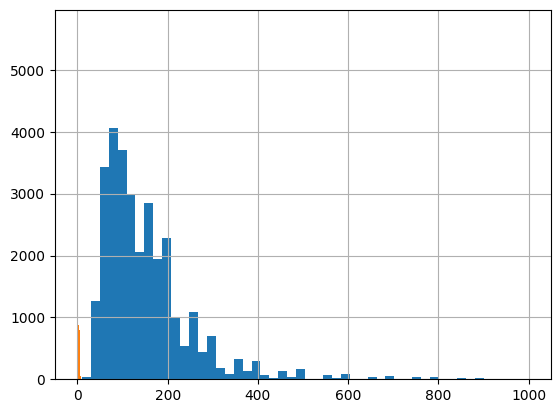

In [4]:
! git clone https://github.com/DS3001/wrangling

import numpy as np
import pandas as pd

print("PART 1: \n Airbnb Prices: \n")
#Question 2, Part 1
df = pd.read_csv('./wrangling/assignment/data/airbnb_hw.csv')

#print(df.shape, '\n') # returns (rows,columns)
#print(df.dtypes, '\n') # names of columns

#print(df.loc[0:10,('Price')],'\n')
#df = df.rename(columns = {'Price':'pr'})

df['pr'] = df['Price'] # Categorical variable example
var = 'pr'
#print(df[var].unique(),'\n') # list of unique numbers occuring
print(df[var].value_counts(), '\n') # number of times each value occurs

print('Before coercion: \n', df[var].describe(),'\n')
df[var].str.replace(',','') #removing commas
df[var] = pd.to_numeric(df[var], errors='coerce') #coerce the variable to numeric
print('After coercion: \n', df[var].describe(),'\n')

df[var].hist(bins = 50)



# Create a missing dummy:
df[var+'_nan'] = df[var].isnull() # Equals 1 if missing, 0 if non-null
print('Total Missings: \n', sum(df[var+'_nan']),'\n') # How many missing values are there?


#Question 2, Part 2
print("PART 2: \n Shark attacks: \n")
df = pd.read_csv('./wrangling/assignment/data/sharks.csv', low_memory = False)

print(df.shape, '\n') # returns (rows,columns)
##print(df.dtypes, '\n') # names of columns

df['tp'] = df['Type'] # Categorical variable example
var = 'tp'
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')
df[var+'_nan'] = df[var].isnull()
print('Total Missings: \n', sum(df[var+'_nan']),'\n')

df[var].replace({'Invalid': 'Unknown','Unconfirmed':'Unknown', 'Questionable': 'Unknown','Boating': 'Boat', 'Boatomg': 'Boat'}, inplace=True)
df[var] = df[var].fillna('Unknown')
print(df[var].value_counts(), '\n')
print(df[var].unique(), '\n')

# Bar plot
"""
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.title(f'Count of Shark Attack Types')
plt.xlabel('Types')
plt.ylabel('Count')
categories = df[var].unique()
values = df[var].value_counts()
plt.bar(categories, values, color='blue')
plt.show()

"""
#Question 2, Part 3
print("PART 3: \n Defedants Released Pretrial: + \n")
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)


df['pre_rel'] = df['WhetherDefendantWasReleasedPretrial'] # Categorical variable example
var = 'pre_rel'
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n') #There are 31 9s in the data
df[var+'_nan'] = df[var].isnull()
print('Total Missings: \n', sum(df[var+'_nan']),'\n')
df[var] = df[var].fillna('Unknown')
df[var].replace({0: 'Not released', 1: 'Released', 9: 'Unknown'}, inplace=True)
print(df[var].value_counts(), '\n')


print("PART 4: \n Sentencing at Conviction: + \n")
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)


print(df.loc[0:10,('SentenceTypeAllChargesAtConvictionInContactEvent')],'\n')
print(df.loc[0:10,('ImposedSentenceAllChargeInContactEvent')],'\n')
df['imposed'] = df['ImposedSentenceAllChargeInContactEvent'] # Categorical variable example
var = 'imposed'
df[var].replace({' ': '0',})
df[var] = pd.to_numeric(df[var], errors='coerce')
print(df[var].value_counts(), '\n')
df[var] = np.arcsinh(df[var])
df[var].hist(bins = 20)



**Q3.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?